# Step 1: Data Preprocessing

## Step 1.1: Importing Python Libraries


In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.mlab as mlab
%matplotlib inline

# Step 1.2 Loading Data into Data Frame

In [4]:
heart_df = pd.read_csv("framingham.csv")
heart_df.drop(['education'],axis=1,inplace=True)
##heart_df = heart_df[heart_df['male'] == 1]
heart_df = heart_df.dropna()
heart_df = heart_df.reset_index(drop=True)

In [5]:
heart_df.dtypes

male                 int64
age                  int64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [6]:
heart_df_clean = pd.DataFrame()

heart_df_clean['Gender'] = heart_df['male']
heart_df_clean['Age'] = heart_df['age']
heart_df_clean['CurrentSmoker'] = heart_df['currentSmoker']
heart_df_clean['CigsPerDay'] = heart_df['cigsPerDay']
heart_df_clean['BPMeds'] = heart_df['BPMeds']
heart_df_clean['PrevalentStroke'] = heart_df['prevalentStroke']
heart_df_clean['PrevalentHyp'] = heart_df['prevalentHyp']
heart_df_clean['Diabetes'] = heart_df['diabetes']
heart_df_clean['TotChol'] = heart_df['totChol']
heart_df_clean['SysBP'] = heart_df['sysBP']
heart_df_clean['DiaBP'] = heart_df['diaBP']
heart_df_clean['BMI'] = heart_df['BMI']
heart_df_clean['HeartRate'] = heart_df['heartRate']
heart_df_clean['Glucose'] = heart_df['glucose']
heart_df_clean['TenYearCHD'] = heart_df['TenYearCHD']

heart_df_clean.to_csv("heart_df_clean.csv")
from google.colab import files

heart_df_clean



,Gender,Age,CurrentSmoker,CigsPerDay,BPMeds,PrevalentStroke,PrevalentHyp,Diabetes,TotChol,SysBP,DiaBP,BMI,HeartRate,Glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
3747,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
3748,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
3749,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


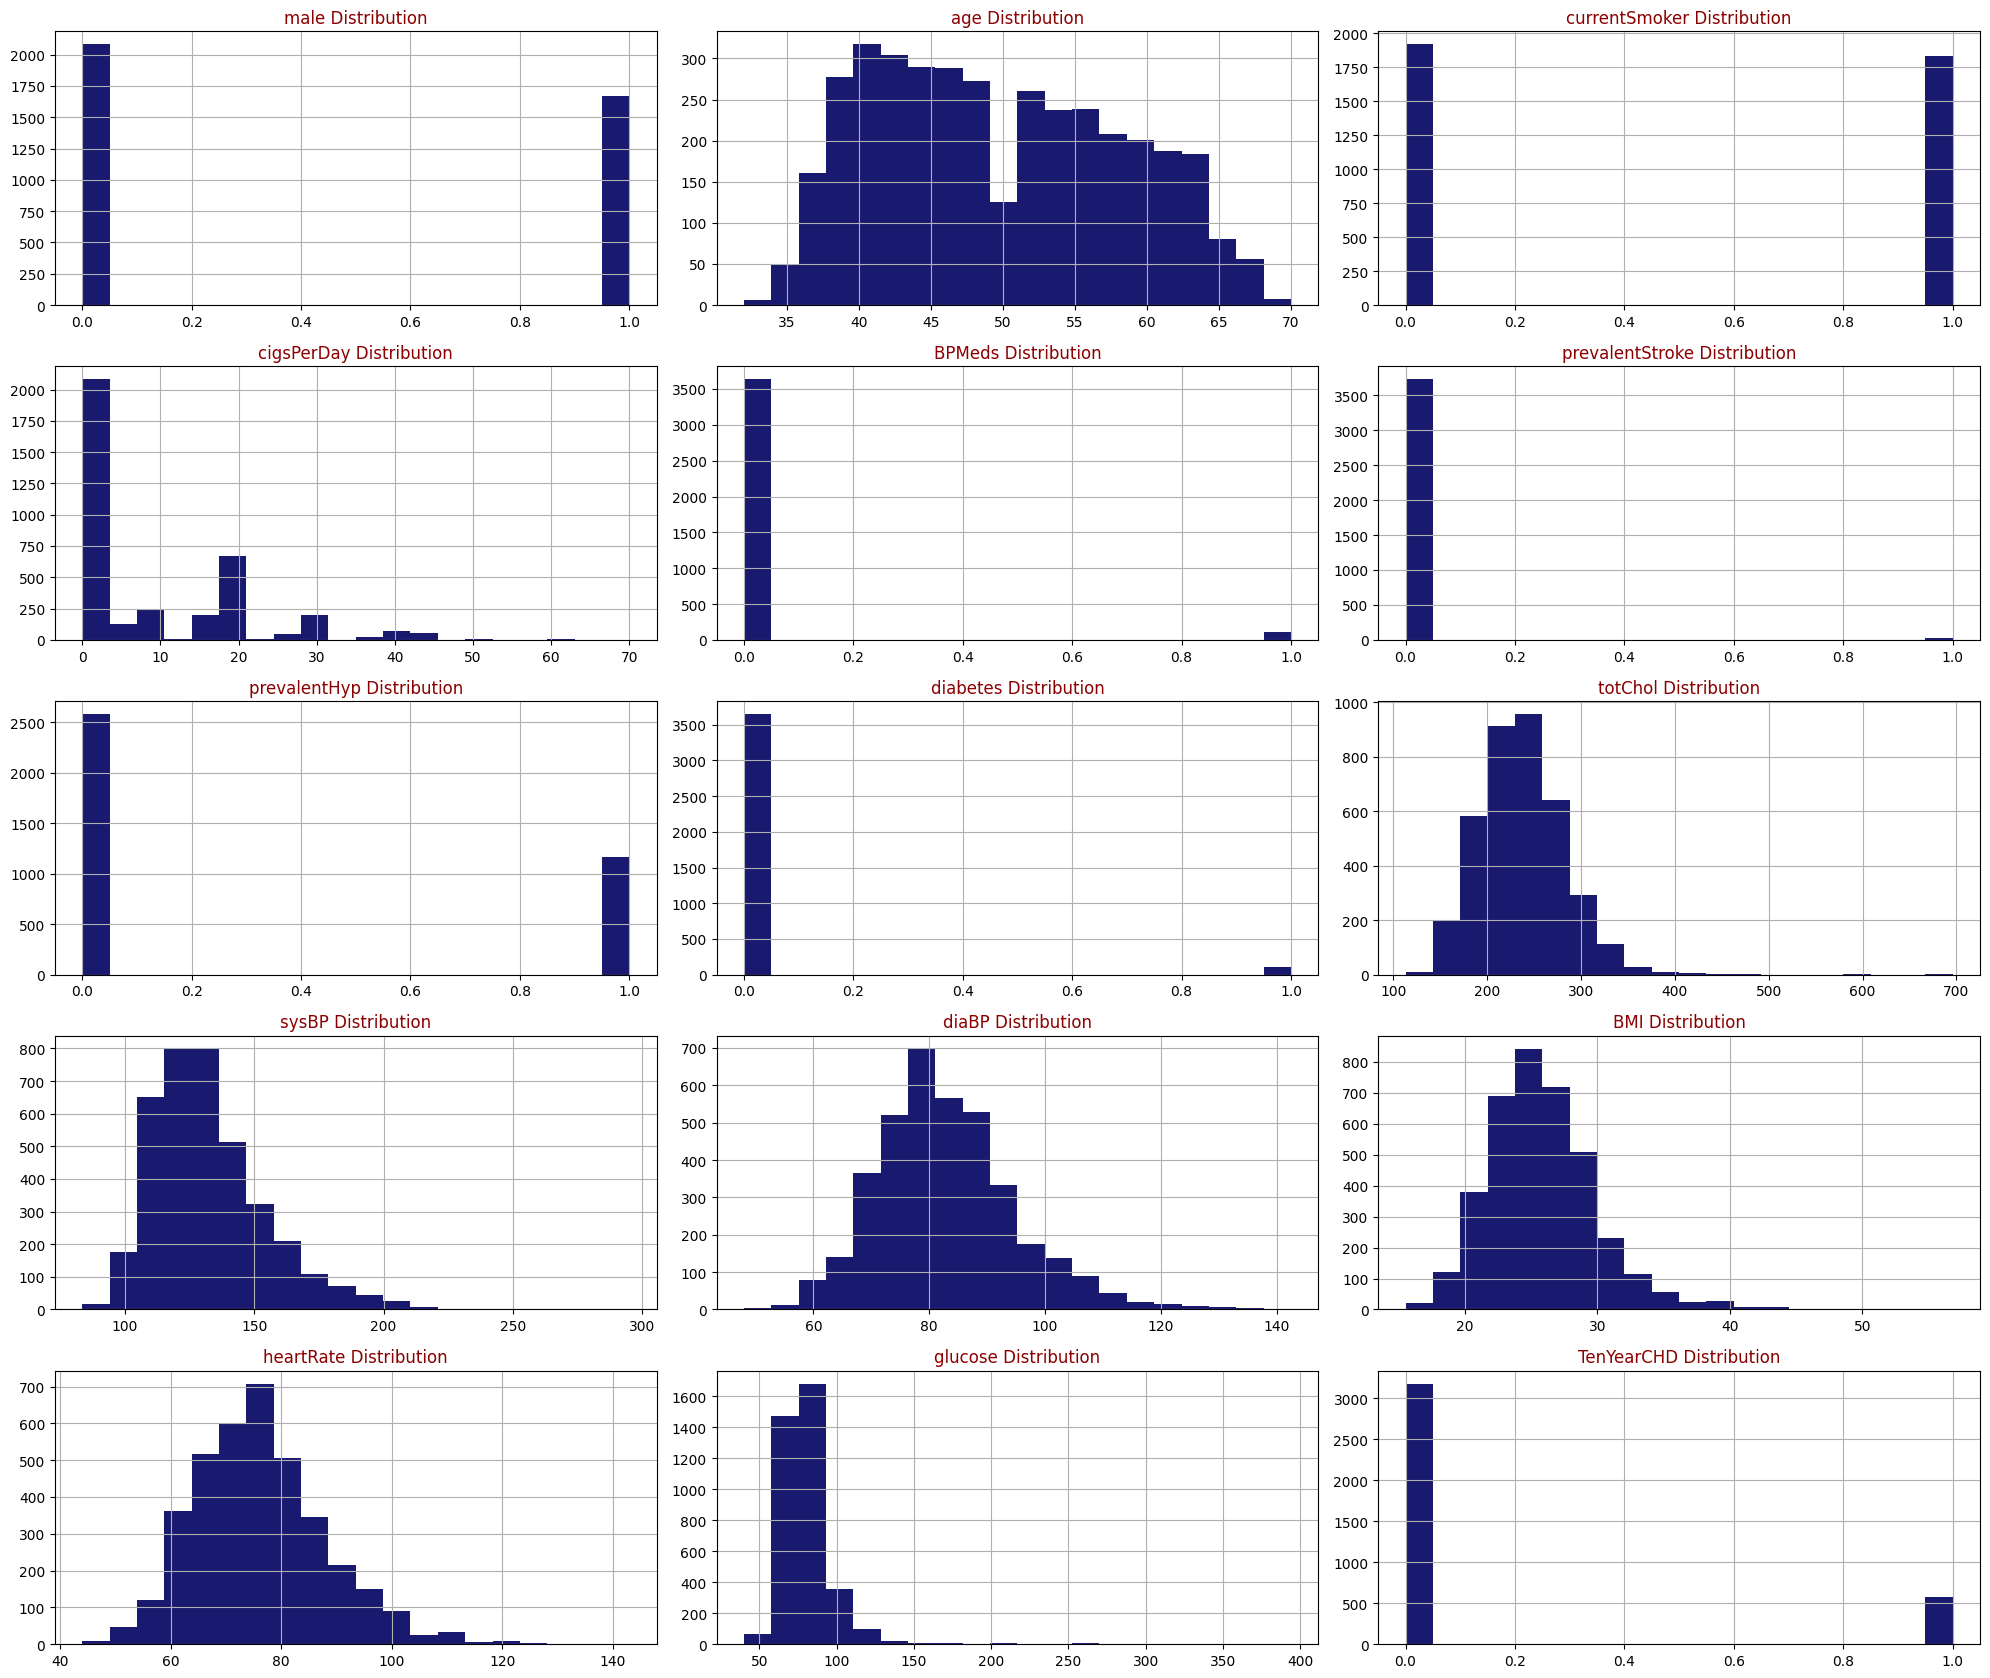

In [28]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')

    fig.tight_layout()
    plt.show()
draw_histograms(heart_df,heart_df.columns,6,3)

##Step 1.3 Split data into male and female data frames

In [8]:
males_df = heart_df_clean.loc[heart_df_clean["Gender"]==1]
males_df.head()
print(males_df.shape)
pos_males = males_df.loc[males_df["TenYearCHD"]== 1]
print(pos_males.shape)

females_df = heart_df_clean.loc[heart_df_clean["Gender"]==0]
females_df.head()
print(females_df.shape)
pos_females = females_df.loc[females_df["TenYearCHD"]== 1]
print(pos_males.shape)

(1670, 15)
(319, 15)
(2081, 15)
(319, 15)


#Step 2.1 Creating Logarithmic Regression model

In [9]:
hd_labels = heart_df_clean['TenYearCHD']
hd_features = heart_df_clean.drop('TenYearCHD', axis = 1)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(hd_features,
                                                    hd_labels,
                                                    test_size=0.2,
                                                    random_state=42)

#Step 2.2 Running Logarithmic Regression Model

In [11]:

logesticRegression = LogisticRegression(max_iter= 1000)


logesticRegression.fit(x_train, y_train)


y_pred = logesticRegression.predict(x_test)

# Step 2.3: Evaluating the models accuracy, precision, recall, and F1-score

Accuracy: 0.8756660746003553
Precision: 0.5714285714285714
Recall: 0.08391608391608392
F1-score: 0.14634146341463414


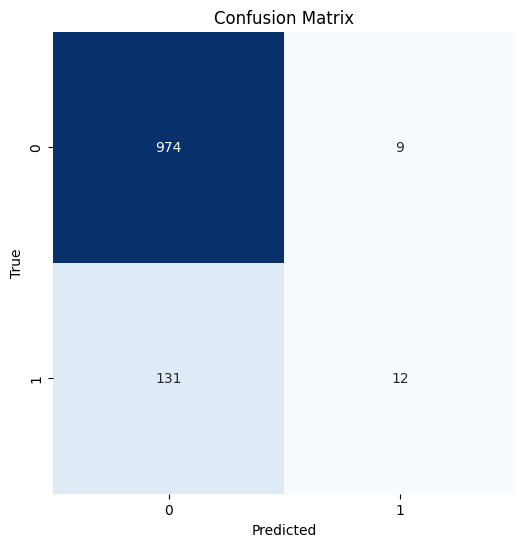

In [30]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



#Step 2.4: Increasing accuracy of the Logarithmic Regression Model

In [16]:
st.chisqprob = lambda chisq, df: st.chi2.sf(chisq, df)
cols=heart_df_clean.columns[:-1]
model=sm.Logit(heart_df.TenYearCHD,heart_df_clean[cols])
result=model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.400050
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3737
Method:                           MLE   Df Model:                           13
Date:                Tue, 28 Nov 2023   Pseudo R-squ.:                 0.06313
Time:                        21:51:39   Log-Likelihood:                -1500.6
converged:                       True   LL-Null:                       -1601.7
Covariance Type:            nonrobust   LLR p-value:                 4.723e-36
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Gender              0.4089      0.103      3.976      0.000       0.207       0.610
Age                 0.0286      0.006      4.989      0.000       0.017       0.040
CurrentSmoker      -0.2367      0.150     -1.574      0.115      -0.531       0.058
CigsPerDay          0.0214      0.006      3.528      0.000       0.010       0.033
BPMeds              0.3241      0.227      1.426      0.154      -0.121       0.770
PrevalentStroke     0.7838      0.483      1.623      0.105      -0.163       1.731
PrevalentHyp        0.9718      0.122      7.964      0.000       0.733       1.211
Diabetes            0.7825      0.291      2.686      0.007       0.212       1.354
TotChol            -0.0015      0.001     -1.386      0.166      -0.004       0.001
SysBP               0.0133      0.004      3.548      0.000       0.006       0.021
DiaBP              -0.0301      0.006     -5.027      0.000      -0.042      -0.018
BMI                -0.0465      0.012     -3.804      0.000      -0.070      -0.023
HeartRate          -0.0228      0.004     -5.817      0.000      -0.031      -0.015
Glucose             0.0019      0.002      0.899      0.369      -0.002       0.006
===================================================================================
"""

Finds P values that show either a high or low relationship between the variable and having heart disease

In [24]:
def elem (data_frame,dep_var,col_list):


    while len(col_list)>0 :
        model=sm.Logit(dep_var,data_frame[col_list])
        result=model.fit(disp=0)
        largest_pvalue=round(result.pvalues,3).nlargest(1)
        if largest_pvalue[0]<(0.05):
            return result
            break
        else:
            col_list=col_list.drop(largest_pvalue.index)

newcols=elem(heart_df_clean,heart_df_clean.TenYearCHD,cols)
newcols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3751
Model:                          Logit   Df Residuals:                     3742
Method:                           MLE   Df Model:                            8
Date:                Tue, 28 Nov 2023   Pseudo R-squ.:                 0.05995
Time:                        22:02:11   Log-Likelihood:                -1505.7
converged:                       True   LL-Null:                       -1601.7
Covariance Type:            nonrobust   LLR p-value:                 3.016e-37
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Gender           0.4164      0.102      4.088      0.000       0.217       0.616
Age              0.0270      0.005      4.926      0.000       0.016       0.038
CigsPerDay       0.0137      0.004      3.372      0.001       0.006       0.022
PrevalentHyp     1.0221      0.118      8.654      0.000       0.791       1.254
Diabetes         0.9642      0.227      4.250      0.000       0.520       1.409
SysBP            0.0137      0.004      3.688      0.000       0.006       0.021
DiaBP           -0.0312      0.006     -5.247      0.000      -0.043      -0.020
BMI             -0.0466      0.012     -3.870      0.000      -0.070      -0.023
HeartRate       -0.0245      0.004     -6.505      0.000      -0.032      -0.017
================================================================================
"""

In [26]:

new_features=heart_df_clean[['Age','Gender','CigsPerDay','TotChol','SysBP','Glucose','TenYearCHD']]
x=new_features.iloc[:,:-1]
y=new_features.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=5)
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#Step 2.5: Running improved Logarithmic Regression

Accuracy: 0.8756660746003553
Precision: 0.5714285714285714
Recall: 0.08391608391608392
F1-score: 0.14634146341463414


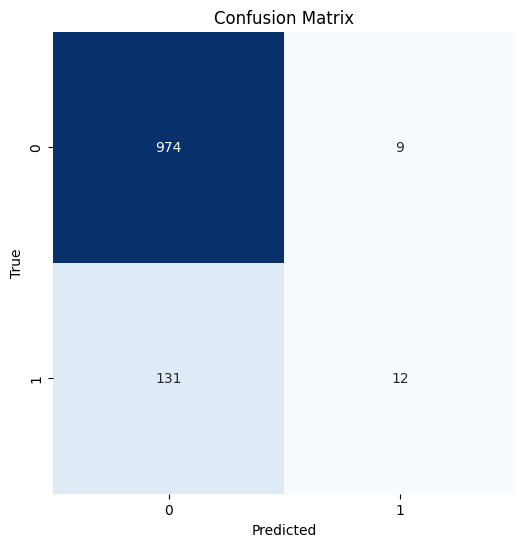

In [25]:

logreg = LogisticRegression(max_iter= 1000)


logreg.fit(x_train, y_train)


y_pred = logreg.predict(x_test)


print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 6))
sn.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


#Step 2.6: Logarithmic Regression Based on Gender

In [ ]:
mhd_labels = males_df['TenYearCHD']
mhd_features = males_df.drop('TenYearCHD', axis = 1)
fhd_labels = females_df['TenYearCHD']
fhd_features = females_df.drop('TenYearCHD', axis = 1)

x_train, x_test, y_train, y_test = train_test_split(mhd_features,
                                                    mhd_labels,
                                                    test_size=0.2,
                                                    random_state=42)

logesticRegression = LogisticRegression(max_iter= 1000)


logesticRegression.fit(x_train, y_train)


y_pred = logesticRegression.predict(x_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))



Accuracy: 0.8143712574850299
Precision: 0.6666666666666666
Recall: 0.09230769230769231
F1-score: 0.16216216216216217


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(fhd_features,
                                                    fhd_labels,
                                                    test_size=0.3,
                                                    random_state=42)

logesticRegression = LogisticRegression(max_iter= 1000)


logesticRegression.fit(x_train, y_train)


y_pred = logesticRegression.predict(x_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1-score:', f1_score(y_test, y_pred))

Accuracy: 0.8784
Precision: 0.5
Recall: 0.039473684210526314
F1-score: 0.07317073170731707


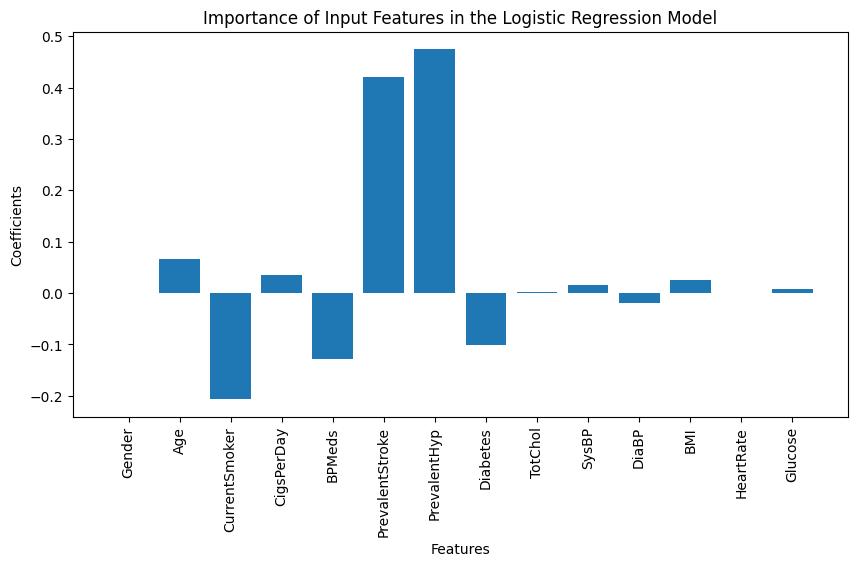

            Feature  Importance
6      PrevalentHyp    0.474570
5   PrevalentStroke    0.420086
1               Age    0.065872
3        CigsPerDay    0.035204
11              BMI    0.025738
9             SysBP    0.015427
13          Glucose    0.008722
8           TotChol    0.001347
12        HeartRate    0.001034
0            Gender    0.000000
10            DiaBP   -0.018557
7          Diabetes   -0.100283
4            BPMeds   -0.127736
2     CurrentSmoker   -0.206525


In [ ]:
plt.figure(figsize=(10,5))
plt.bar(hd_features.columns, logesticRegression.coef_[0])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Importance of Input Features in the Logistic Regression Model')
plt.show()


most_important_feature_index = np.argmax(np.abs(logesticRegression.coef_[0]))
most_important_feature_name = hd_features.columns[most_important_feature_index]

feature_importance = pd.DataFrame({"Feature": hd_features.columns, "Importance": logesticRegression.coef_[0]})
feature_importance = feature_importance.sort_values(by="Importance", ascending=False)
print(feature_importance)

#Step 2.5: Evaluating importance based on Gender

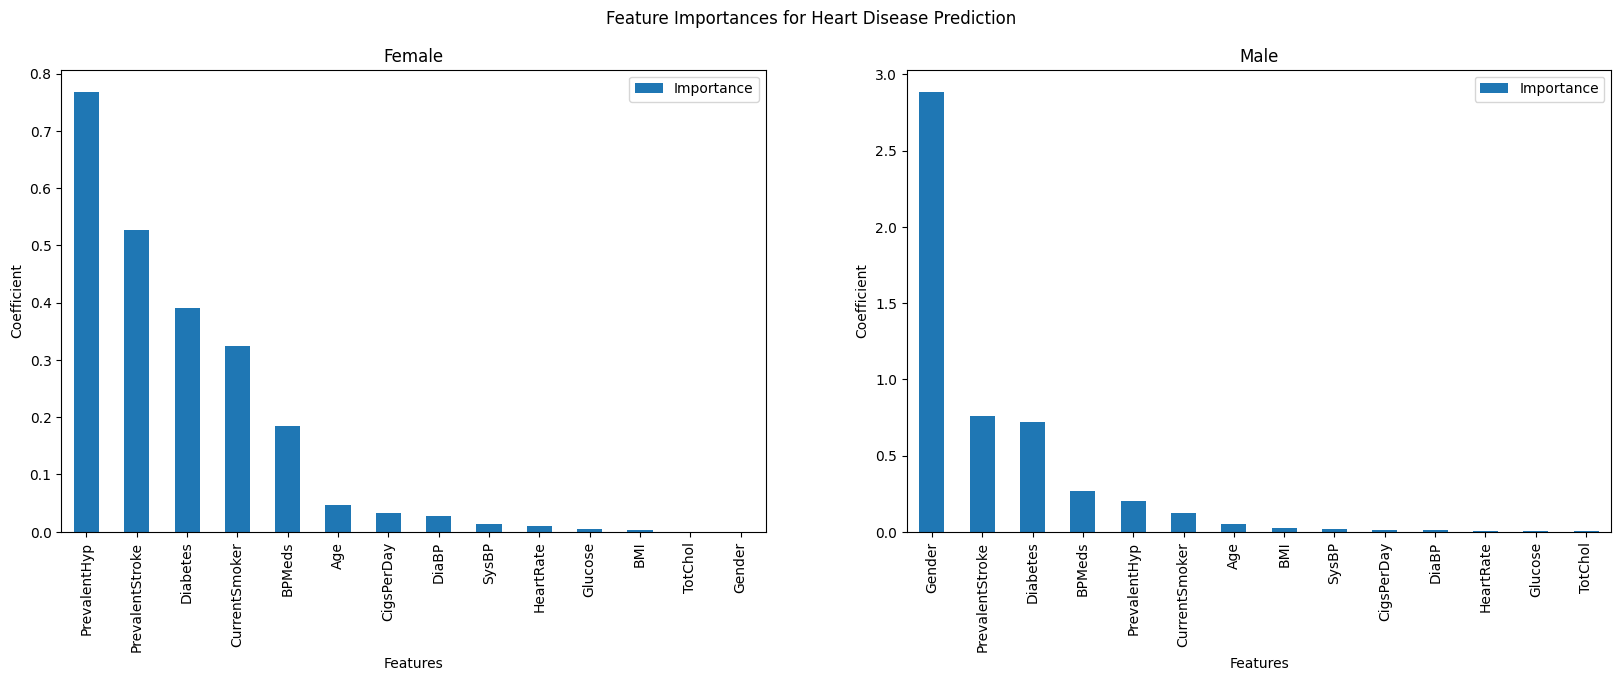

In [ ]:

def get_feature_importances(model, features):
    importances = np.abs(model.coef_[0])
    return pd.DataFrame({'Feature': features.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

def plot_feature_importances(importances, gender, ax):
    importances.plot(kind='bar', x='Feature', y='Importance', ax=ax)
    ax.set_title(gender)
    ax.set_xlabel('Features')
    ax.set_ylabel('Coefficient')





hd_labels = heart_df_clean['TenYearCHD']
hd_features = heart_df_clean.drop('TenYearCHD', axis=1)


male_features = hd_features[heart_df_clean['Gender'] == 1]
male_labels = hd_labels[heart_df_clean['Gender'] == 1]

female_features = hd_features[heart_df_clean['Gender'] == 0]
female_labels = hd_labels[heart_df_clean['Gender'] == 0]


male_X_train, male_X_test, male_y_train, male_y_test = train_test_split(male_features, male_labels, test_size=0.2, random_state=42)
female_X_train, female_X_test, female_y_train, female_y_test = train_test_split(female_features, female_labels, test_size=0.2, random_state=42)


male_logreg = LogisticRegression(solver='liblinear', max_iter=1000)
male_logreg.fit(male_X_train, male_y_train)

female_logreg = LogisticRegression(solver='liblinear', max_iter=1000)
female_logreg.fit(female_X_train, female_y_train)


male_importances = get_feature_importances(male_logreg, male_features)
female_importances = get_feature_importances(female_logreg, female_features)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle('Feature Importances for Heart Disease Prediction')

plot_feature_importances(female_importances, 'Female', ax1)
plot_feature_importances(male_importances, 'Male', ax2)

def plot_feature_importances(importances, gender, ax):
    importances.plot(kind='bar', x='Feature', y='Importance', ax=ax)
    ax.set_title(gender)
    ax.set_xlabel('Features')
    ax.set_ylabel('Coefficient')
    plt.show()
plt.show()


#Step 3.1 Creating and Training MLP Classifier

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier


train_features = heart_df_clean[["Gender", "Age", "CurrentSmoker", "CigsPerDay", "BPMeds", "PrevalentStroke", "PrevalentHyp", "Diabetes", "TotChol", "SysBP", "DiaBP", "BMI", "HeartRate", "Glucose"]]

train_labels = heart_df_clean['TenYearCHD']

train_features.head()
train_labels.head()


lr_classifier = LogisticRegression(solver='lbfgs',max_iter=10000)
mlp_classifier = MLPClassifier(solver='lbfgs', alpha=1e-5,
                               hidden_layer_sizes=(8, 2), random_state=11,max_iter=10000)


# train our models
lr_classifier.fit(train_features.to_numpy(),train_labels.to_numpy())
mlp_classifier.fit(train_features.to_numpy(),train_labels.to_numpy())

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(8, 2), max_iter=10000,
              random_state=11, solver='lbfgs')

#Step 3.2 Running MLP Classifier

In [ ]:
test_inputs = heart_df_clean[["Gender", "Age", "CurrentSmoker", "CigsPerDay", "BPMeds", "PrevalentStroke", "PrevalentHyp", "Diabetes", "TotChol", "SysBP", "DiaBP", "BMI", "HeartRate", "Glucose"]]

y_actual = heart_df_clean['TenYearCHD']

# predict using logistic regression model
y_predicted_lr = lr_classifier.predict(test_inputs.to_numpy())
lr_accuracy_score = accuracy_score(y_predicted_lr,y_actual)

# predict using logistic regression model
y_predicted_mlp = mlp_classifier.predict(test_inputs.to_numpy())
mlp_accuracy_score = accuracy_score(y_predicted_mlp,y_actual)

print (f"Accuracy of the Logistic Classifier = {lr_accuracy_score}")
print (f"Accuracy of the MLP Classifier = {mlp_accuracy_score}")


Accuracy of the Logistic Classifier = 0.8552386030391895
Accuracy of the MLP Classifier = 0.8475073313782991


#Step 4.1: Finding Percentage of Heart Disease Cases by Gender

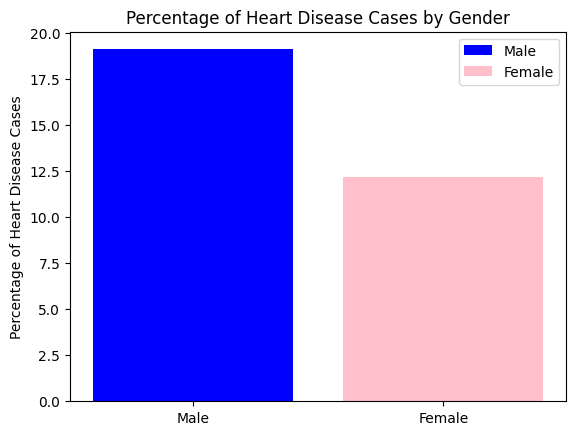

Male: 319 out of 1670 have heart disease
Female: 253 out of 2081 have heart disease


In [ ]:
male_df = heart_df_clean[heart_df_clean['Gender'] == 1]
female_df = heart_df_clean[heart_df_clean['Gender'] == 0]

# Count the number of heart disease cases in both genders
male_hd_count = male_df['TenYearCHD'].sum()
female_hd_count = female_df['TenYearCHD'].sum()

# Calculate the percentage of heart disease cases in both genders
male_percentage = (male_hd_count / len(male_df)) * 100
female_percentage = (female_hd_count / len(female_df)) * 100

# Generate bar graphs for both genders
fig, ax = plt.subplots()
ax.bar(['Male'], [male_percentage], color='blue', label='Male')
ax.bar(['Female'], [female_percentage], color='pink', label='Female')
ax.set_ylabel('Percentage of Heart Disease Cases')
ax.set_title('Percentage of Heart Disease Cases by Gender')
ax.legend()
plt.show()

# Print the number of people with and without heart disease for both genders as percentages
print(f'Male: {male_hd_count} out of {len(male_df)} have heart disease')
print(f'Female: {female_hd_count} out of {len(female_df)} have heart disease')




#Step 4.2: Heart Disease Correlation Matrix

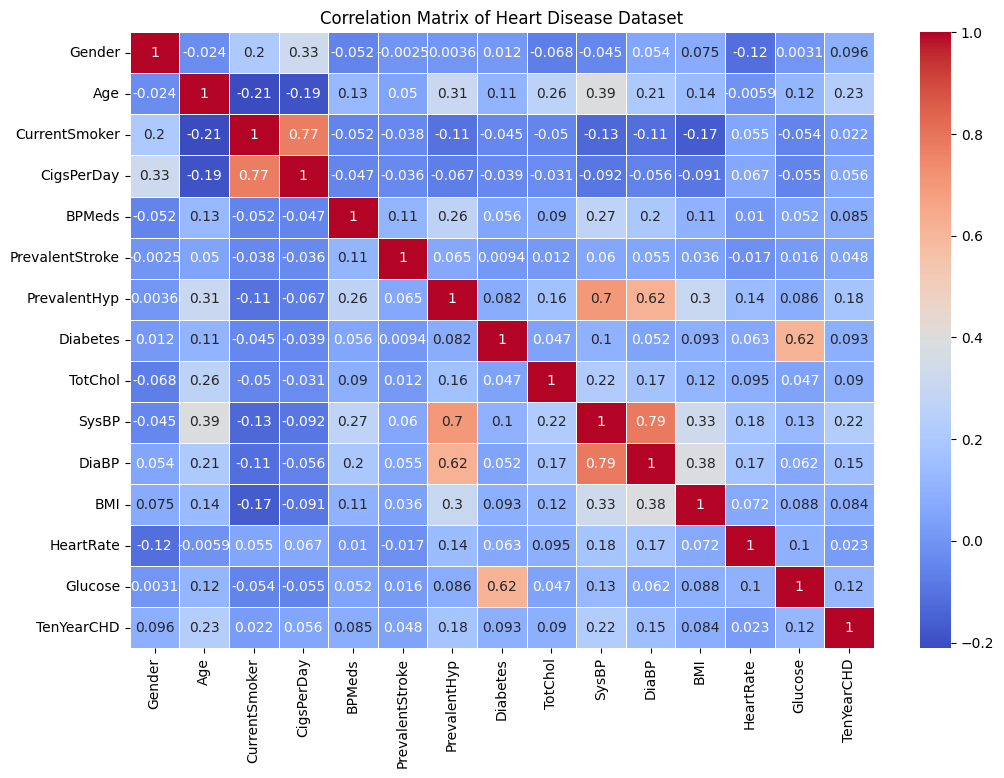

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate the correlation matrix
correlation_matrix = heart_df_clean.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Heart Disease Dataset')
plt.show()

In [31]:

correlation_matrix = heart_df_clean.corr()


correlation_matrix = correlation_matrix.drop('TenYearCHD', axis=0)
correlation_matrix = correlation_matrix.drop('TenYearCHD', axis=1)


uc = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool)).stack()


sc = uc.sort_values()


print("Correlations between input features, sorted from least to greatest:")
print(sc)


max_corr = sc.idxmax()
print(f"\nThe two input features with the highest correlation are {max_corr[0]} and {max_corr[1]}.")

Correlations between input features, sorted from least to greatest:
Age            CurrentSmoker   -0.211338
               CigsPerDay      -0.188804
CurrentSmoker  BMI             -0.165404
               SysBP           -0.133154
Gender         HeartRate       -0.115444
                                  ...   
Diabetes       Glucose          0.616087
PrevalentHyp   DiaBP            0.616753
               SysBP            0.697849
CurrentSmoker  CigsPerDay       0.773259
SysBP          DiaBP            0.785853
Length: 91, dtype: float64

The two input features with the highest correlation are SysBP and DiaBP.


<ipython-input-31-8d5209010e92>:8: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  uc = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool)).stack()


#Step 4.3: Finding Percentage of Heart Disease Cases by Age Range

<ipython-input-33-eaff102a6f95>:3: RuntimeWarning: invalid value encountered in long_scalars
  percentage = (hd_count / len(dataframe)) * 100


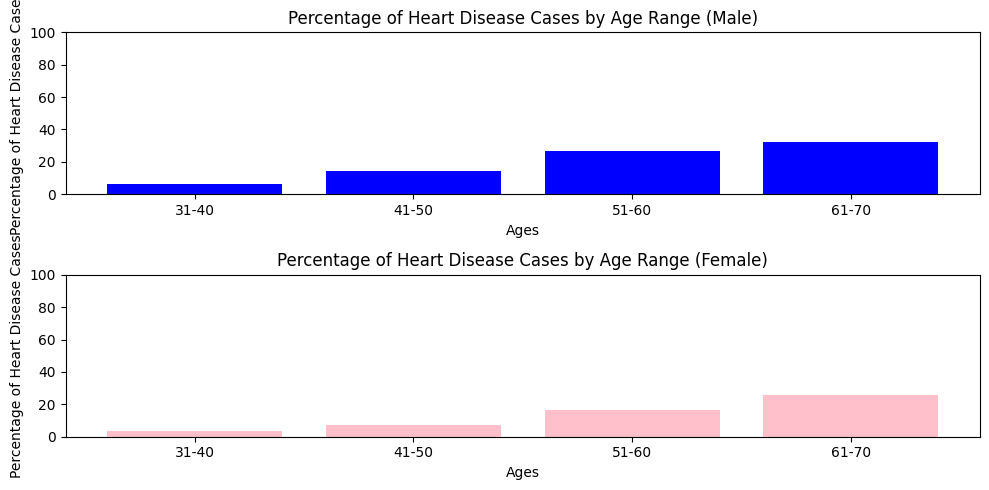

In [33]:
def calculate_hd_percentage(dataframe):
    hd_count = dataframe['TenYearCHD'].sum()
    percentage = (hd_count / len(dataframe)) * 100
    return percentage
male_age_ranges = [(18, 30), (31, 40), (41, 50), (51, 60), (61, 70), (71, 80)]
female_age_ranges = [(18, 30), (31, 40), (41, 50), (51, 60), (61, 70), (71, 80)]


age_gender_hd_data = heart_df_clean[['Age', 'Gender', 'TenYearCHD']].copy()

age_gender_hd_data['Gender'] = age_gender_hd_data['Gender'].replace({1: 'Male', 0: 'Female'})


mp = [calculate_hd_percentage(age_gender_hd_data[(age_gender_hd_data['Gender'] == 'Male') &
                                                            (age_gender_hd_data['Age'] >= min_age) &
                                                            (age_gender_hd_data['Age'] <= max_age)])
                    for min_age, max_age in male_age_ranges]

fp = [calculate_hd_percentage(age_gender_hd_data[(age_gender_hd_data['Gender'] == 'Female') &
                                                              (age_gender_hd_data['Age'] >= min_age) &
                                                              (age_gender_hd_data['Age'] <= max_age)])
                      for min_age, max_age in female_age_ranges]


x_labels_male = [f'{min_age}-{max_age}' for min_age, max_age in male_age_ranges]
x_labels_female = [f'{min_age}-{max_age}' for min_age, max_age in female_age_ranges]

fig, ax = plt.subplots(2, 1, figsize=(10, 5))

ax[0].bar(x_labels_male, mp, color='blue')
ax[0].set_xlabel('Ages')
ax[0].set_ylabel('Percentage of Heart Disease Cases')
ax[0].set_title('Percentage of Heart Disease Cases by Age Range (Male)')
ax[0].set_ylim(0, 100)

ax[1].bar(x_labels_female, fp, color='pink')
ax[1].set_xlabel('Ages')
ax[1].set_ylabel('Percentage of Heart Disease Cases')
ax[1].set_title('Percentage of Heart Disease Cases by Age Range (Female)')
ax[1].set_ylim(0, 100)

plt.tight_layout()
plt.show()
fig.savefig('heart_disease_percentage_by_gender.png')


#Step 4.4: Finding Percentage of Heart Disease Cases by Systolic Blood Pressure

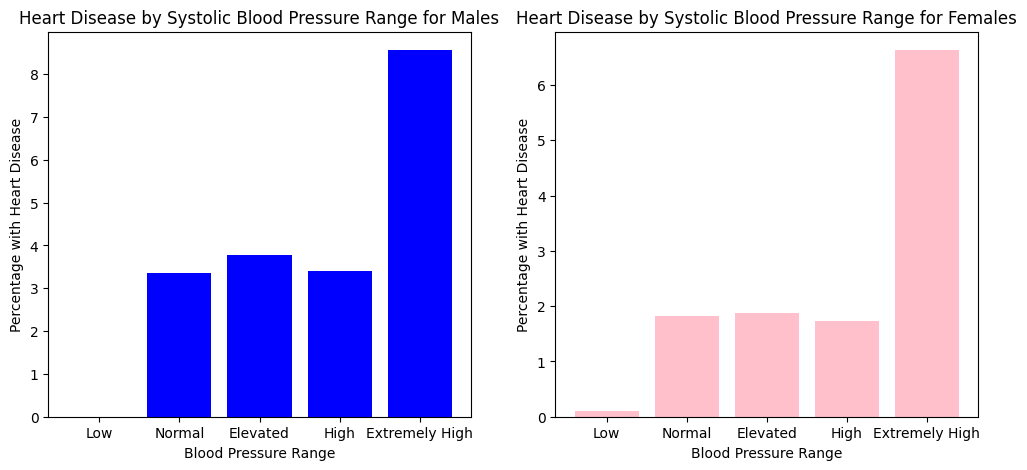

In [ ]:

male_df = heart_df_clean[heart_df_clean['Gender'] == 1]
female_df = heart_df_clean[heart_df_clean['Gender'] == 0]


bp_ranges = {'Low' : (0,90), 'Normal': (90, 120), 'Elevated': (120, 130), 'High': (130, 140), 'Extremely High': (140, 1000)}


male_bp_counts = [((male_df['SysBP'] >= bp_ranges['Low'][0]) & (male_df['SysBP'] < bp_ranges['Low'][1]) & (male_df['TenYearCHD'] == 1)).mean(),
                  ((male_df['SysBP'] > bp_ranges['Normal'][0]) & (male_df['SysBP'] < bp_ranges['Normal'][1]) & (male_df['TenYearCHD'] == 1)).mean(),
                  ((male_df['SysBP'] >= bp_ranges['Elevated'][0]) & (male_df['SysBP'] < bp_ranges['Elevated'][1]) & (male_df['TenYearCHD'] == 1)).mean(),
                  ((male_df['SysBP'] >= bp_ranges['High'][0]) & (male_df['SysBP'] < bp_ranges['High'][1]) & (male_df['TenYearCHD'] == 1)).mean(),
                  ((male_df['SysBP'] >= bp_ranges['Extremely High'][0]) & (male_df['SysBP'] < bp_ranges['Extremely High'][1]) & (male_df['TenYearCHD'] == 1)).mean()]

female_bp_counts = [((female_df['SysBP'] > bp_ranges['Low'][0]) & (female_df['SysBP'] < bp_ranges['Low'][1]) & (female_df['TenYearCHD'] == 1)).mean(),
                    ((female_df['SysBP'] > bp_ranges['Normal'][0]) & (female_df['SysBP'] < bp_ranges['Normal'][1]) & (female_df['TenYearCHD'] == 1)).mean(),
                    ((female_df['SysBP'] >= bp_ranges['Elevated'][0]) & (female_df['SysBP'] < bp_ranges['Elevated'][1]) & (female_df['TenYearCHD'] == 1)).mean(),
                    ((female_df['SysBP'] >= bp_ranges['High'][0]) & (female_df['SysBP'] < bp_ranges['High'][1]) & (female_df['TenYearCHD'] == 1)).mean(),
                    ((female_df['SysBP'] >= bp_ranges['Extremely High'][0]) & (female_df['SysBP'] < bp_ranges['Extremely High'][1]) & (female_df['TenYearCHD'] == 1)).mean()]


male_bp_counts = [x*100 for x in male_bp_counts]
female_bp_counts = [x*100 for x in female_bp_counts]


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.bar(list(bp_ranges.keys()), male_bp_counts, color='blue')
ax1.set_xlabel('Blood Pressure Range')
ax1.set_ylabel('Percentage with Heart Disease')
ax1.set_title('Heart Disease by Systolic Blood Pressure Range for Males')



ax2.bar(list(bp_ranges.keys()), female_bp_counts, color='pink')
ax2.set_xlabel('Blood Pressure Range')
ax2.set_ylabel('Percentage with Heart Disease')
ax2.set_title('Heart Disease by Systolic Blood Pressure Range for Females')

plt.show()

#Step 4.5: Finding Percentage of Heart Disease Cases by Diastolic Blood Pressure

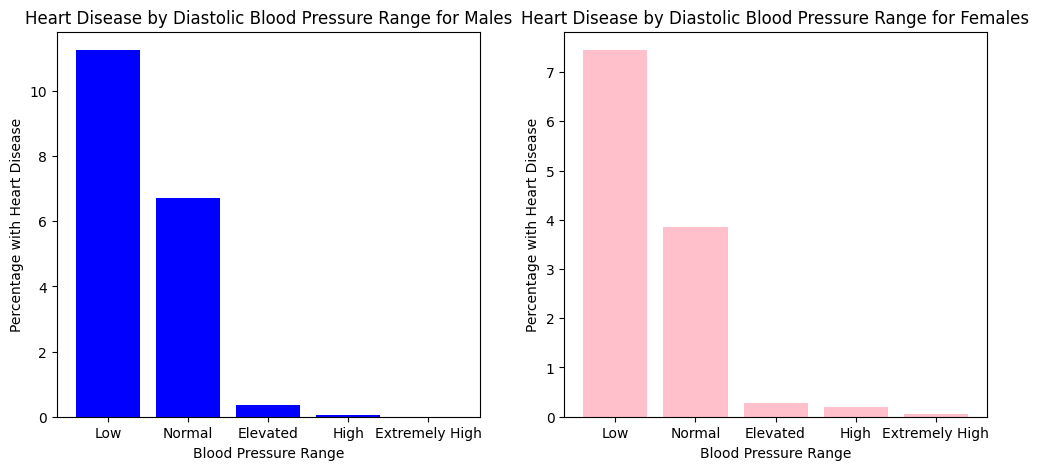

In [32]:

male_df = heart_df_clean[heart_df_clean['Gender'] == 1]
female_df = heart_df_clean[heart_df_clean['Gender'] == 0]


bp_ranges = {'Low' : (0,90), 'Normal': (90, 120), 'Elevated': (120, 130), 'High': (130, 140), 'Extremely High': (140, 1000)}


male_bp_counts = [((male_df['DiaBP'] >= bp_ranges['Low'][0]) & (male_df['DiaBP'] < bp_ranges['Low'][1]) & (male_df['TenYearCHD'] == 1)).mean(),
                  ((male_df['DiaBP'] > bp_ranges['Normal'][0]) & (male_df['DiaBP'] < bp_ranges['Normal'][1]) & (male_df['TenYearCHD'] == 1)).mean(),
                  ((male_df['DiaBP'] >= bp_ranges['Elevated'][0]) & (male_df['DiaBP'] < bp_ranges['Elevated'][1]) & (male_df['TenYearCHD'] == 1)).mean(),
                  ((male_df['DiaBP'] >= bp_ranges['High'][0]) & (male_df['DiaBP'] < bp_ranges['High'][1]) & (male_df['TenYearCHD'] == 1)).mean(),
                  ((male_df['DiaBP'] >= bp_ranges['Extremely High'][0]) & (male_df['DiaBP'] < bp_ranges['Extremely High'][1]) & (male_df['TenYearCHD'] == 1)).mean()]

female_bp_counts = [((female_df['DiaBP'] > bp_ranges['Low'][0]) & (female_df['DiaBP'] < bp_ranges['Low'][1]) & (female_df['TenYearCHD'] == 1)).mean(),
                    ((female_df['DiaBP'] > bp_ranges['Normal'][0]) & (female_df['DiaBP'] < bp_ranges['Normal'][1]) & (female_df['TenYearCHD'] == 1)).mean(),
                    ((female_df['DiaBP'] >= bp_ranges['Elevated'][0]) & (female_df['DiaBP'] < bp_ranges['Elevated'][1]) & (female_df['TenYearCHD'] == 1)).mean(),
                    ((female_df['DiaBP'] >= bp_ranges['High'][0]) & (female_df['DiaBP'] < bp_ranges['High'][1]) & (female_df['TenYearCHD'] == 1)).mean(),
                    ((female_df['DiaBP'] >= bp_ranges['Extremely High'][0]) & (female_df['DiaBP'] < bp_ranges['Extremely High'][1]) & (female_df['TenYearCHD'] == 1)).mean()]


male_bp_counts = [x*100 for x in male_bp_counts]
female_bp_counts = [x*100 for x in female_bp_counts]


fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.bar(list(bp_ranges.keys()), male_bp_counts, color='blue')
ax1.set_xlabel('Blood Pressure Range')
ax1.set_ylabel('Percentage with Heart Disease')
ax1.set_title('Heart Disease by Diastolic Blood Pressure Range for Males')



ax2.bar(list(bp_ranges.keys()), female_bp_counts, color='pink')
ax2.set_xlabel('Blood Pressure Range')
ax2.set_ylabel('Percentage with Heart Disease')
ax2.set_title('Heart Disease by Diastolic Blood Pressure Range for Females')

plt.show()